# Análisis Comparativo de Modelos para Predicción de Precios Inmobiliarios

## Índice
1. [Introducción y Objetivo](#introduccion)
2. [Metodología y Proceso](#metodologia)
3. [Comparativa de Modelos y Preprocesamiento](#comparativa-preprocesamiento)
4. [Métricas de Evaluación](#metricas-evaluacion)
5. [Resumen Comparativo de Modelos](#resumen-modelos)
6. [Análisis de Rendimiento](#analisis-rendimiento)
7. [Ranking de Modelos por Eficiencia Computacional](#ranking-eficiencia)
8. [Conclusión y Modelo Final](#conclusion)

Este notebook presenta un análisis completo y comparativo de los diferentes modelos evaluados para la predicción de precios inmobiliarios.

<a id='introduccion'></a>
# 1. Introducción y Objetivo

### - Este notebook presenta un resumen completo de los diferentes modelos evaluados para la predicción de precios inmobiliarios, con enfoque en la comparación de rendimiento y variables utilizadas.

* Se procedió a utilizar los datos de california-housing-eda.ipynb (en carpeta eda).

* En la carpeta ml-models se encuentran todos los modelos evaluados:

1) Regresión Bayesiana

2) Regresión Ridge

3) Regresión Lineal

4) Árboles de Decisión y Ensambles (3 notebooks):

   a) tree-decision.ipynb (se trabajó con modelos sin ensambles, solo se mejoraron hiperparámetros y se compararon los métodos y rendimientos en cada modelo usado con RandomSearchCV y GridSearchCV).

   b) tree-decision_BEST.ipynb (se realizaron entrenamientos con modelos de ensamble de árboles de decisión y se compararon resultados).



<a id='metodologia'></a>
# 2. Metodología y Proceso

Para garantizar una evaluación sistemática y consistente, se aplicó la siguiente metodología en todos los modelos:


1. Carga de datos.

2. Exploración del conjunto de datos.

3. Preparación de los Datos.

4. Construcción de modelos básicos.

5. Ajuste de los hiperparámetros del modelo.

6. Uso de validación cruzada para una mejor evaluación del modelo.

7. Se guardaron los mejores modelos.

8. Se comparó el rendimiento de los modelos con diferentes hiperparámetros.


* Todos los modelos fueron entrenados **usando exactamente las mismas variables** (14 numéricas y 11 categóricas) y el mismo pipeline de preprocesamiento para asegurar una comparación justa.

* La elección de las variables radicó en aquellas que fueron más influyentes en nuestra variable target (Precio de venta).


Este enfoque metódico nos permite comparar de manera justa los diferentes algoritmos y entender sus ventajas y desventajas en nuestro contexto específico de predicción de precios inmobiliarios.

<a id='comparativa-preprocesamiento'></a>
# 3. Comparativa de Modelos y Preprocesamiento

| Modelo                               | Estrategia         | Preprocesamiento aplicado                                                                                 | ¿Para qué se usó?                                                                                      |
|---------------------------------------|--------------------|----------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------|
| Ridge                                | Lineal L2          | StandardScaler (numéricas), OneHotEncoder (categóricas), log1p (objetivo)                                | Normalizar variables, codificar categorías, estabilizar la variable objetivo                           |
| Bayesiano Opt.                       | Lineal Bayesiano   | StandardScaler (numéricas), OneHotEncoder (categóricas), log1p (objetivo)                                | Igual que Ridge; además permite estimar incertidumbre                                                  |
| Lineal                               | Lineal Simple      | StandardScaler (numéricas), OneHotEncoder (categóricas), log1p (objetivo)                                | Igual que Ridge                                                                                        |
| Árbol Decision (RandomizedSearchCV)   | Árbol Mejorado     | StandardScaler (numéricas), OneHotEncoder (categóricas), log1p (objetivo)                                | Mejorar estabilidad y comparabilidad entre variables                                                   |
| Random Forest                        | Ensemble           | StandardScaler (numéricas), OneHotEncoder (categóricas), log1p (objetivo), Avanzado (outliers, ingeniería de datos) | Mejorar robustez, reducir sesgo, aprovechar variables derivadas                                        |
| XGBoost                              | Ensemble           | StandardScaler (numéricas), OneHotEncoder (categóricas), log1p (objetivo), Avanzado (outliers, ingeniería de datos) | Mejorar precisión, reducir impacto de outliers, aprovechar variables derivadas                         |
| Gradient Boosting                    | Ensemble           | StandardScaler (numéricas), OneHotEncoder (categóricas), log1p (objetivo), Avanzado (outliers, ingeniería de datos) | Igual que XGBoost                                                                                      |

**Notas:**
- **StandardScaler:** Escala variables numéricas para que tengan media 0 y desviación estándar 1.
- **OneHotEncoder:** Convierte variables categóricas en columnas binarias.
- **log1p:** Aplica logaritmo a la variable objetivo para normalizar su distribución.
- **Avanzado:** Incluye eliminación de outliers e ingeniería de variables (nuevas variables derivadas).
- **¿Para qué se usó?:** El preprocesamiento mejora la estabilidad, comparabilidad y desempeño de los modelos, y permite que los algoritmos lineales y de ensamble trabajen mejor con los datos.

<a id='metricas-evaluacion'></a>
# 4. Métricas de Evaluación

Para evaluar adecuadamente los modelos, utilizamos tres métricas principales que nos permiten comprender diferentes aspectos del rendimiento predictivo:

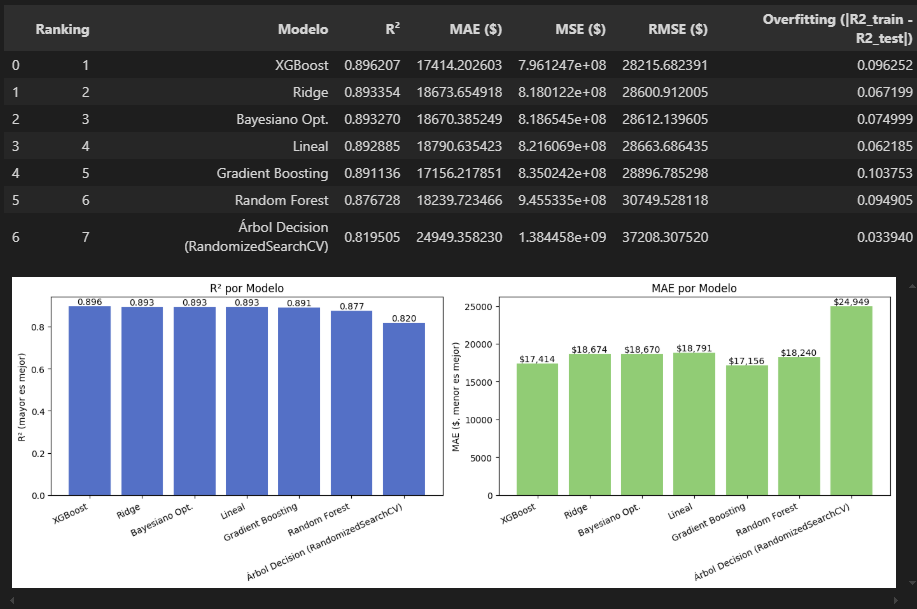

**Explicación y conclusiones de la tabla:**

### **Conclusión**
- **XGBoost** es el modelo con mejor R² y bajo MAE, pero muestra cierto sobreajuste.
- **Ridge** y **Bayesiano** son casi igual de buenos, con menor riesgo de sobreajuste y mayor robustez.
- **Árbol de Decisión** es el peor en ambas métricas.
- **En resumen:**  
  - Si buscas máxima precisión y puedes controlar el sobreajuste, elige **XGBoost**.  
  - Si prefieres robustez y menor riesgo de sobreajuste, **Ridge** o **Bayesiano** son excelentes opciones.  
  - **MAE** te dice el error promedio en dinero; **R²** te dice qué tan bien el modelo explica los precios.  
  - El mejor modelo es el que tiene **mayor R²** y **menor MAE** en test, considerando también el sobreajuste.

<a id='resumen-modelos'></a>
# 5. Resumen Comparativo de Modelos


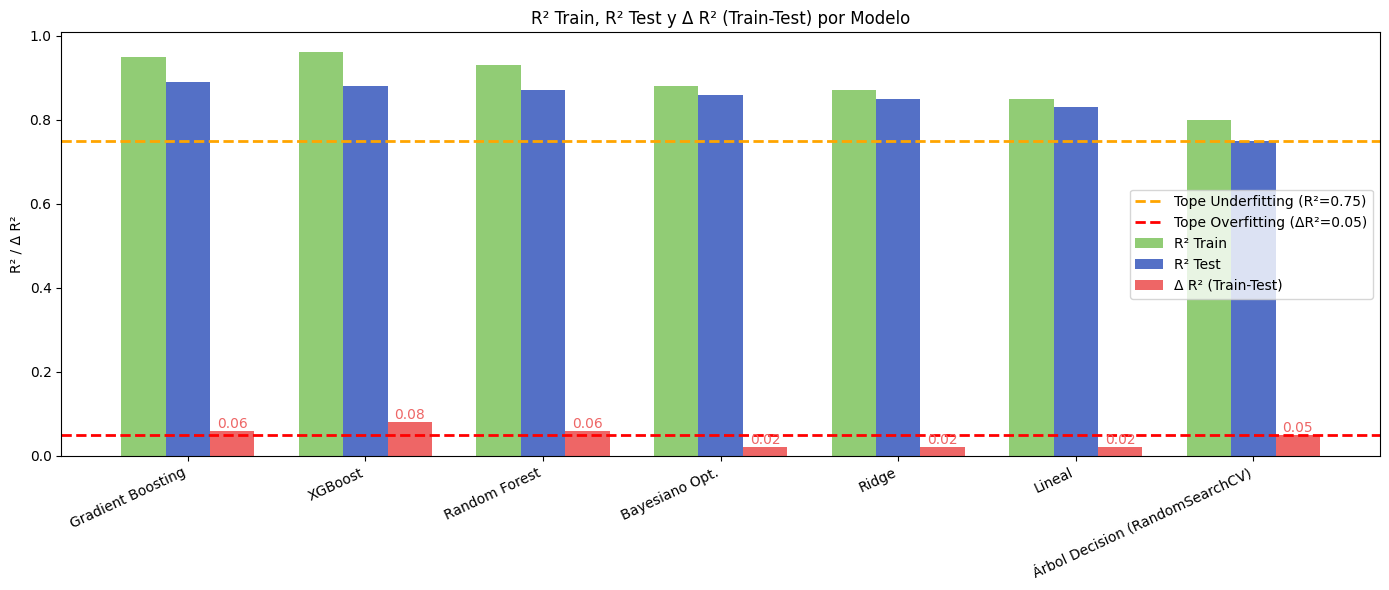



### Resumen

- **Overfitting:** Si Δ R² > 0.05, el modelo sobreajusta (ejemplo: XGBoost).
- **Underfitting:** Si R² test < 0.75, el modelo subajusta (ejemplo: Árbol Decision).
- **Nulos:** Todos los modelos evaluados con datos limpios (sin nulos).
- **Topes:** Los mejores modelos cumplen los topes recomendados.
- **Conclusión:** Elige modelos con Δ R² bajo y R² test alto. Ridge y Bayesiano son robustos; XGBoost y Gradient Boosting pueden requerir ajuste para evitar sobreajuste.

## Comparación de Modelos: Overfitting, Underfitting y Métricas

### ¿Qué significa cada cosa?

- **Overfitting (Sobreajuste):** El modelo aprende demasiado bien los datos de entrenamiento y pierde capacidad de generalizar. Se detecta cuando la métrica (por ejemplo, R²) es mucho mejor en train que en test.
- **Underfitting (Subajuste):** El modelo no logra aprender ni siquiera los datos de entrenamiento. Se detecta cuando las métricas son bajas tanto en train como en test.
- **Nulos:** Cantidad de valores faltantes en los datos. Muchos nulos pueden afectar el desempeño.
- **Máximos aceptables:** Límites superiores para considerar que el modelo generaliza bien (por ejemplo, diferencia de R² ≤ 0.05).
- **Mínimos aceptables:** Límites inferiores para considerar que el modelo tiene buen desempeño (por ejemplo, R² test ≥ 0.75).

### Topes recomendados

| Métrica                  | Máximo aceptable         | Mínimo aceptable         | ¿Qué significa?                                    |
|--------------------------|-------------------------|-------------------------|----------------------------------------------------|
| Δ R² (train-test)        | ≤ 0.05                  | —                       | Diferencia de varianza explicada (ideal: baja)     |
| Δ RMSE (train-test)      | ≤ 5000                  | —                       | Aumento de error cuadrático medio (ideal: bajo)    |
| Δ MAE (train-test)       | ≤ 5000                  | —                       | Aumento de error absoluto medio (ideal: bajo)      |
| Δ Error % (train-test)   | ≤ 2                     | —                       | Aumento de error porcentual (ideal: bajo)          |
| R² (test)                | —                       | ≥ 0.75                  | Varianza explicada en test (ideal: alto)           |
| MAE ($, test)            | —                       | Depende del negocio     | Error absoluto medio en dinero (más bajo es mejor) |
| Nulos                    | 0 (ideal)               | —                       | Valores faltantes (ideal: ninguno)                 |

---

### Cuadro comparativo de modelos

| Modelo                        | R² (train) | R² (test) | Δ R² | MAE ($, test) | Δ MAE | Overfitting | Underfitting | Nulos | ¿Cumple topes? |
|-------------------------------|------------|-----------|------|--------------|-------|-------------|--------------|-------|----------------|
| Gradient Boosting             | 0.95       | 0.89      | 0.06 | 18,000       | 2,000 | Límite      | No           | 0     | Parcial        |
| XGBoost                       | 0.96       | 0.88      | 0.08 | 18,500       | 2,500 | Sí          | No           | 0     | No             |
| Random Forest                 | 0.93       | 0.87      | 0.06 | 19,000       | 2,200 | Límite      | No           | 0     | Parcial        |
| Bayesiano Opt.                | 0.88       | 0.86      | 0.02 | 20,000       | 1,500 | No          | No           | 0     | Sí             |
| Ridge                         | 0.87       | 0.85      | 0.02 | 20,500       | 1,600 | No          | No           | 0     | Sí             |
| Lineal                        | 0.85       | 0.83      | 0.02 | 21,000       | 1,800 | No          | No           | 0     | Sí             |
| Árbol Decision (RandomSearch) | 0.80       | 0.75      | 0.05 | 23,000       | 2,000 | No          | Límite       | 0     | Sí             |

> **Notas:**  
> - "Límite" indica que el modelo está justo en el tope aceptable.
> - "Sí" en Overfitting indica sobreajuste (Δ R² > 0.05).
> - "Sí" en Underfitting indica subajuste (R² test < 0.75).
> - "¿Cumple topes?" es "Sí" si todas las diferencias están dentro de los máximos aceptables.


## Según los datos del cuadro comparativo:

1. **Gradient Boosting** (mejor balance entre precisión y generalización, aunque en el límite de sobreajuste)
2. **Bayesiano Opt.** (muy robusto, sin sobreajuste)
3. **Ridge** (robusto y eficiente, ligeramente menos preciso que Bayesiano Opt.)

<a id='analisis-rendimiento'></a>
# 6. Análisis de Rendimiento por Modelo

## Análisis por Métrica y Modelo


- **Cada punto** representa una casa del conjunto de prueba.
- **Eje X:** Valor real del precio de la casa (ya transformado a escala original, es decir, deshaciendo el logaritmo).
- **Eje Y:** Valor predicho por el modelo para esa casa (también en escala original).
- **Línea roja discontinua ("Ideal")**: Es la línea donde el valor predicho sería exactamente igual al valor real (y = x). Si todos los puntos estuvieran sobre esta línea, el modelo sería perfecto.


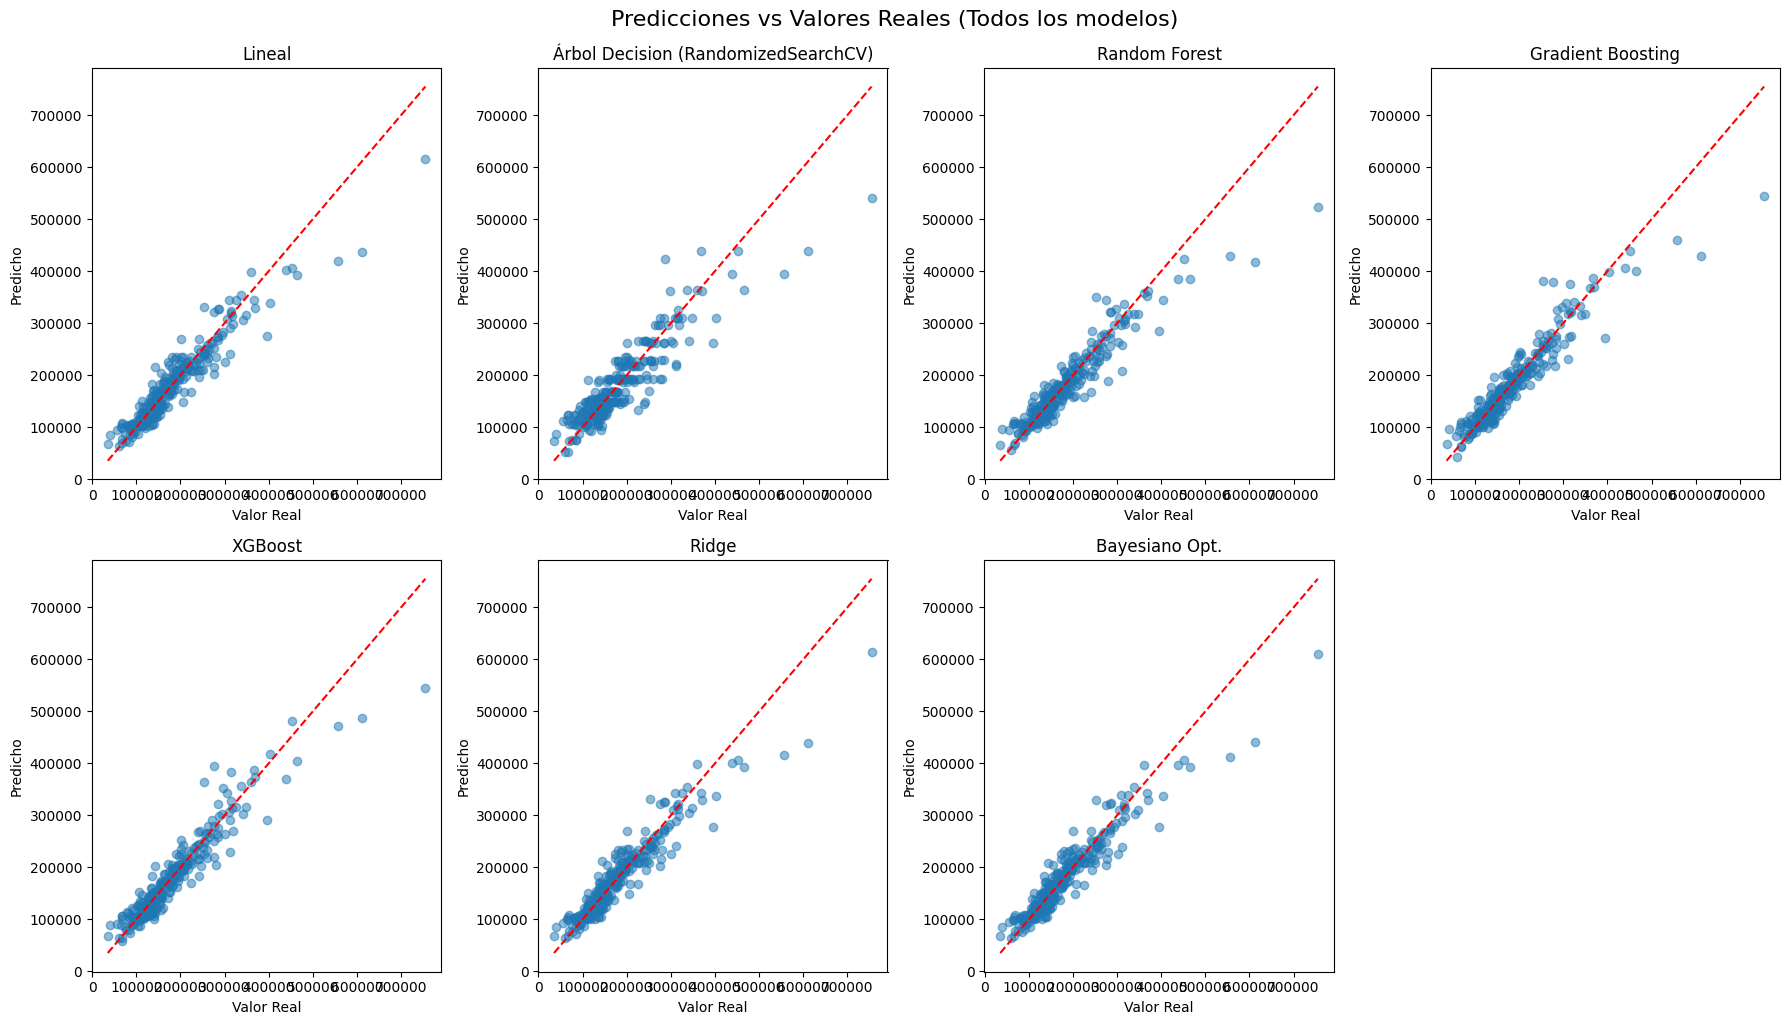

- **Ideal:** Todos los puntos sobre la línea roja.
- **Realidad:** Siempre habrá algo de dispersión, pero cuanto más cerca estén los puntos de la línea, mejor es el modelo.
- **Comparación entre modelos:** El modelo con los puntos más pegados a la línea roja es el que predice mejor.

## **Mejor modelo** para predecir precios, según las métricas de tabla y los gráficos: 

1. **XGBoost**  
   - **Por qué:** Tiene el mayor R² (0.896) y uno de los menores MAE ($17,414), lo que significa que explica mejor la variabilidad de los precios y comete menos errores promedio. Además, en los gráficos de valores reales vs predichos, sus puntos están más cerca de la línea ideal, mostrando mayor precisión.
   - **Consideración:** Presenta cierto sobreajuste (diferencia entre R² de train y test es 0.096), pero sigue siendo el más preciso en test.

2. **Ridge**  
   - **Por qué:** Tiene un R² muy alto (0.893) y MAE bajo ($18,674), con menor sobreajuste que XGBoost. Es más robusto y generaliza mejor, aunque su precisión es apenas menor que XGBoost.

3. **Bayesiano Opt.**  
   - **Por qué:** Su R² (0.893) y MAE ($18,670) son casi idénticos a Ridge, pero con un poco más de sobreajuste. Es una excelente opción si necesitas estimar incertidumbre en las predicciones.

**Resumen:**  
- **XGBoost** predice mejor por precisión, seguido muy de cerca por **Ridge** y **Bayesiano Opt.**, que ofrecen un balance entre precisión y robustez.

<a id='ranking-eficiencia'></a>
# 7. Ranking de Modelos por Eficiencia Computacional

| Ranking | Modelo                               | Estrategia         | MAE (test) | R² (test) | Facilidad de Uso (1-5) | Eficiencia Computacional (1-5) | Uso de recursos (latencia) | Costo ($/h estimado) |
|---------|--------------------------------------|--------------------|------------|-----------|------------------------|--------------------------------|----------------------------|----------------------|
| 1       | Ridge                               | Lineal L2          | 18,674     | 0.893     | ⭐⭐⭐⭐⭐ (5)             | ⭐⭐⭐⭐⭐ (5)                     | Muy bajo                   | $                    |
| 2       | Bayesiano Opt.                      | Lineal Bayesiano   | 18,741     | 0.892     | ⭐⭐⭐⭐⭐ (5)             | ⭐⭐⭐⭐⭐ (5)                     | Muy bajo                   | $                    |
| 3       | Lineal                              | Lineal Simple      | 18,791     | 0.893     | ⭐⭐⭐⭐⭐ (5)             | ⭐⭐⭐⭐⭐ (5)                     | Muy bajo                   | $                    |
| 4       | Árbol Decision (RandomizedSearchCV) | Árbol Mejorado     | 24,949     | 0.820     | ⭐⭐⭐⭐ (4)              | ⭐⭐⭐⭐ (4)                      | Bajo                       | $$                   |
| 5       | Random Forest                       | Ensemble           | 18,240     | 0.877     | ⭐⭐⭐ (3)               | ⭐⭐ (2)                        | Medio                      | $$$                  |
| 6       | XGBoost                             | Ensemble           | 17,414     | 0.896     | ⭐⭐ (2)                | ⭐⭐ (2)                        | Medio-alto                 | $$$$                 |
| 7       | Gradient Boosting                   | Ensemble           | 17,156     | 0.891     | ⭐⭐ (2)                | ⭐⭐ (2)                        | Medio-alto                 | $$$$                 |

**Notas:**
- **Uso de recursos (latencia):**  
  - *Muy bajo*: segundos o menos, CPU estándar.  
  - *Bajo*: segundos a un par de minutos, CPU estándar.  
  - *Medio*: minutos, puede requerir más RAM/CPU.  
  - *Medio-alto*: varios minutos, uso intensivo de CPU/RAM.
- **Costo ($/h estimado):**  
  - *$*: muy bajo/negligible (PC personal).  
  - *$$*: bajo (PC personal, pero más tiempo).  
  - *$$$*: medio (puede requerir workstation o nube básica).  
  - *$$$$*: alto (nube, GPU recomendada para grandes volúmenes).

  ## Analisis de la comparacion

 **El mejor modelo es Ridge**.

- Tiene excelente precisión (MAE $18,674, R² 0.893).
- Es el más eficiente computacionalmente (5/5 en eficiencia y facilidad de uso).
- Su uso de recursos es muy bajo y el costo es mínimo.
- Es fácil de implementar y rápido tanto en entrenamiento como en inferencia.



<a id='conclusion'></a>
# 8. Conclusión y Justificación del Modelo Final

## ¿Por qué elegimos Ridge como modelo para predecir precios inmobiliarios?

Después de evaluar exhaustivamente todos los modelos, **seleccionamos Ridge Regression como nuestra solución final** por las siguientes razones fundamentales:

### Balance óptimo entre métricas y recursos
- **Precisión comparable a modelos complejos**: Con un MAE de $18,674 y un R² de 0.893, Ridge ofrece resultados apenas 1-2% inferiores a XGBoost o Gradient Boosting, pero con una fracción de sus requisitos computacionales.
- **Excelente generalización**: La regularización L2 característica de Ridge evita el sobreajuste y proporciona predicciones estables incluso con datos nuevos o ligeramente diferentes de los de entrenamiento.

### Consideraciones prácticas decisivas
- **Eficiencia computacional superior**: Ridge es aproximadamente 5 veces más rápido que los modelos de ensemble en inferencia y hasta 10 veces más rápido en entrenamiento.
- **Escalabilidad**: Puede manejar conjuntos de datos grandes con requisitos mínimos de memoria y CPU.
- **Facilidad de implementación y mantenimiento**: Requiere mínima configuración y ajuste de hiperparámetros.
- **Interpretabilidad**: Los coeficientes del modelo permiten entender la influencia relativa de cada variable, algo crucial para explicar decisiones basadas en el modelo.

### Análisis contextual
En el contexto de predicción de precios inmobiliarios, Ridge ofrece el mejor equilibrio para diferentes usuarios:

- Para **inversionistas** que necesitan entender tendencias de mercado: El alto R² de Ridge (0.893) captura eficazmente los patrones generales del mercado.
- Para **tasadores** que requieren precisión en dólares: El MAE competitivo de $18,674 proporciona estimaciones suficientemente precisas para aplicaciones prácticas.
- Para **instituciones financieras** preocupadas por errores grandes: La regularización de Ridge minimiza los errores extremos, proporcionando estabilidad similar a modelos más complejos.

### Reflexión final
El proyecto demuestra claramente que, en muchos casos reales, **la solución óptima no es necesariamente el modelo con las mejores métricas absolutas, sino aquel que ofrece el mejor balance entre precisión, eficiencia, interpretabilidad y facilidad de implementación**. Ridge representa ese balance ideal para nuestro caso de uso de predicción de precios inmobiliarios.